In [ ]:
#Description: This program classifies patients as having chronic kodney disease (ckkd) or not
#             using Artifical Neural Networks (ANN) 

In [ ]:
#import libraries
import glob 
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('dataset.csv',sep=';')

#print the first 5 rows
df.head()

Saving DATA.csv to DATA.csv


,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,No loss of substance,White,No,Yes,No,No,No,73.0,F,0.0,No,No,LPB,No
1,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
2,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
3,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No
4,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No


In [ ]:
#get the shape of the data (the number of rows and columns)
df.shape

(2362, 14)

In [ ]:
#create a list of column names to keep
columns_to_retain = ['Homogene', 'Reticulated', 'Age', 'Sex', 'Tobacco', 'Stupefies', 'Alcohol', 'Diagnosis', 'Dysplasia']

#drop the columns that are not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#drop the rows with na or missing values
df = df.dropna(axis=0)
df.tail()

,Homogene,Reticulated,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
2357,No,No,23.0,F,0.0,No,No,GINGIVITE,No
2358,Yes,No,23.0,F,0.0,No,No,GINGIVITE,No
2359,Yes,No,23.0,F,0.0,No,No,GINGIVITE,No
2360,Yes,No,67.0,M,0.0,No,No,LPB,No
2361,Yes,No,81.0,M,0.0,No,No,LPB,No


In [ ]:
#transfrom the non-numeric data in the columns

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  else:
    df[column] = LabelEncoder().fit_transform( df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
#print the first 5 rows of the new clean dataset
df.head()

,Homogene,Reticulated,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,0,0,73.0,0,0.0,0,0,21,0
1,1,1,73.0,0,0.0,0,0,21,0
2,1,1,73.0,0,0.0,0,0,21,0
3,1,0,75.0,1,0.0,0,0,20,0
4,1,0,75.0,1,0.0,0,0,20,0


In [ ]:
#split the data into independent (x) dataset (the features) and dependent (y) dataset (the target)
#X = df.drop(['Dysplasia'], axis=1)
#y = df['Dysplasia']
X = df.drop(['Dysplasia'], axis=1)
y = df['Dysplasia']

In [ ]:
#feature Scaling
#min-max Scaler method scales the datase so that all the input feature lie between 0 and 1
x_scaler =MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#split the data into 80% training and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
#build the model
model = Sequential()
model.add( Dense(256, input_dim= len(X.columns) ,kernel_initializer= k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(X_train, y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 1s 677ms/step - loss: 0.6827 - accuracy: 0.8035
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6687 - accuracy: 0.9569
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6549 - accuracy: 0.9569
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6414 - accuracy: 0.9569
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6279 - accuracy: 0.9569
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6147 - accuracy: 0.9569
Epoch 7/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6016 - accuracy: 0.9569
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5886 - accuracy: 0.9569
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5757 - accuracy: 0.9569
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.5629 - accuracy: 0.9569
Epoch 11/2

In [ ]:
#save the model
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
model.save('dysplasia.model')

42/42 [==============================] - 0s 908us/step - loss: 0.2074 - accuracy: 0.9641
INFO:tensorflow:Assets written to: dysplasia.model/assets


Text(0.5, 0, 'epoch')

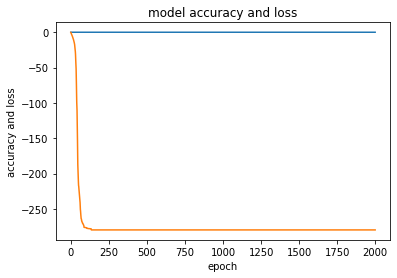

In [ ]:
#Visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


In [ ]:
#Get the shape of the training and testing data set
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (1669, 8)
shape of test data: (418, 8)


In [ ]:
#to see the prediction if patients have dysplasia or not
#show the actual values and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original :{0}'.format(",".join(str(x) for x in y_test)))
print('Predicted :{0}'.format(",".join(str(x) for x in pred)))

Original :0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
Predicted :0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
#if patients has Dysplasia or not
y_test


359     0
51      0
872     0
581     0
786     0
       ..
1693    0
216     0
402     0
375     0
1470    0
Name: Dysplasia, Length: 418, dtype: int64